In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

TOP_POSTER_LIMIT = 10
DOMAIN_LIMIT = 25
REPLIES_THRESHOLD = 150

df = pd.read_csv("data/latest-articles.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='s')
df["title"] = df["title"].astype("category")
df["posted_by"] = df["posted_by"].astype("category")
df["source_url"] = df["source_url"].astype("category")

In [2]:
# A thread is considered sourced if it has a URL link.
sourced = df[df.source_url != ""]

# This is not entirely accurate since some vanity posts have links.
vanity = df[df.source_url == ""]

In [3]:
def extract_domain(url) -> str:
    return (
        url.
            replace("www.","").
            replace("http://", "").
            replace("https://", "").
            split("/")[0]
    )


sourced.insert(len(sourced.columns)-1, "domain", (
    sourced.
        source_url.
        apply(extract_domain).
        astype("category")
))

<AxesSubplot:xlabel='count', ylabel='domain'>

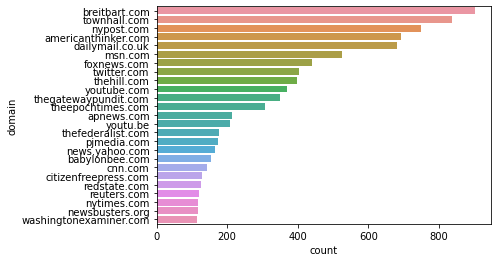

In [4]:
# Draws a chart that shows where discussion for a particular thread originated from.
data = sourced[["source_url", "domain"]].drop_duplicates()
top_sourced_domains = data.domain.value_counts().iloc[:DOMAIN_LIMIT].index
sns.countplot(
    y="domain",
    data=data,
    order=top_sourced_domains,
)

<AxesSubplot:xlabel='count', ylabel='posted_by'>

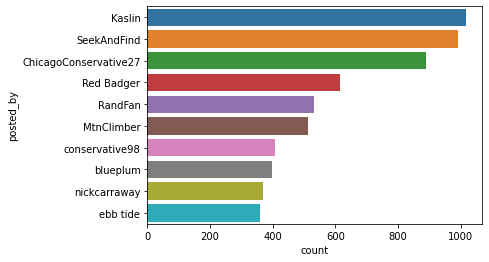

In [5]:
# Draws a chart that shows who posted a topic to be discussed that has a URL source.
data = sourced[["source_url", "posted_by"]].drop_duplicates()
top_sourced_posters = data.posted_by.value_counts().iloc[:TOP_POSTER_LIMIT].index
sns.countplot(
    y="posted_by",
    data=data,
    order=top_sourced_posters,
)

In [6]:
# Comment this if you don't want to see everything.
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Draws a table that shows which freepers posted topics from a sourced link that originated
# from a particular domain.
who_is_posting_from_what = (
    sourced[["posted_by", "source_url", "domain"]].
    query("posted_by in @top_sourced_posters and domain in @top_sourced_domains").
    drop_duplicates().
    groupby(["domain", "posted_by"])
)
who_is_posting_from_what[["domain"]].describe()

domain         \
                                              count unique   
domain                 posted_by                             
americanthinker.com    Kaslin                   269      1   
                       MtnClimber               315      1   
                       SeekAndFind               88      1   
apnews.com             SeekAndFind                1      1   
                       ChicagoConservative27      1      1   
                       RandFan                   13      1   
                       blueplum                   8      1   
                       conservative98             2      1   
breitbart.com          ChicagoConservative27    371      1   
                       RandFan                   13      1   
                       blueplum                   2      1   
                       conservative98            71      1   
                       Red Badger                13      1   
citizenfreepress.com   MtnClimber                 1      1   
                       SeekAndFind               13      1   
                       Red Badger                78      1   
cnn.com                ChicagoConservative27      8      1   
                       blueplum                  13      1   
                       conservative98             5      1   
                       nickcarraway               1      1   
dailymail.co.uk        SeekAndFind                5      1   
                       ChicagoConservative27      2      1   
                       RandFan                   19      1   
                       blueplum                  68      1   
                       conservative98             4      1   
                       Red Badger                13      1   
                       nickcarraway               1      1   
foxnews.com            SeekAndFind                8      1   
                       ChicagoConservative27     23      1   
                       RandFan                   12      1   
                       blueplum                  36      1   
                       conservative98            85      1   
                       Red Badger                 4      1   
msn.com                Kaslin                     2      1   
                       SeekAndFind               20      1   
                       ChicagoConservative27      2      1   
                       RandFan                    5      1   
                       blueplum                  73      1   
                       conservative98             1      1   
                       Red Badger                 6      1   
                       nickcarraway               6      1   
news.yahoo.com         SeekAndFind                6      1   
                       ChicagoConservative27      6      1   
                       RandFan                    1      1   
                       conservative98             5      1   
                       nickcarraway              10      1   
newsbusters.org        Red Badger                 1      1   
nypost.com             MtnClimber                 3      1   
                       SeekAndFind                1      1   
                       ChicagoConservative27    214      1   
                       RandFan                    3      1   
                       blueplum                  12      1   
                       conservative98            78      1   
                       Red Badger                 9      1   
                       nickcarraway              75      1   
                       ebb tide                   1      1   
nytimes.com            SeekAndFind                1      1   
                       RandFan                    2      1   
                       blueplum                   1      1   
                       conservative98             2      1   
pjmedia.com            SeekAndFind               89      1   
                       conservative98             1      1   
               

In [7]:
# Display which posts got the most replies before
# they aged out from the front page.

(sourced[['timestamp', 'title', 'replies']].
     loc[sourced.replies > REPLIES_THRESHOLD].
     groupby('title').
     max().
     sort_values('replies', ascending=False).
     dropna())

,timestamp,replies
title,,
LIVE THREAD: Biden Presser on Afghanistan,2021-08-20 18:11:28,368.0
WATCH LIVE ON AUGUST 16 | 3:45PM ET | C-SPAN President Biden Remarks on Afghanistan,2021-08-16 20:21:15,367.0
Large explosion at Abbey gate at the Kabul airport.[Two explosions one at Abbey Gate. Another at Baron Hotel],2021-08-26 14:55:47,242.0
"Though young and healthy, unvaccinated father dies of COVID",2021-08-21 20:44:40,204.0
How Hydroxchlorquine Causes Heart Problems,2021-08-16 06:42:53,196.0
My Company Requiring Vaccine,2021-08-10 03:20:34,188.0
New Orleans Mayor says there's not enough time to evacuate the city before Hurricane Ida (Cat 4?),2021-08-28 01:07:43,185.0
WATCH LIVE: Biden announces six-part plan to tackle COVID-19 pandemic-FR LIVE THREAD,2021-09-09 21:17:47,179.0
George Stephanopoulos: I'm sitting down with President Biden on Wednesday for an exclusive interview. What would you ask him?,2021-08-17 02:37:05,172.0
